In [206]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import NearestNeighbors

In [207]:
# Simulated transaction data [Transaction Amount ($), Number of Transactions per Day]

X = np.array([

    [20,1],[25,2],[18,1],[30,3],[40,2], # Normal transactions

    [5000,10],[7000,12], [15000,1],[12000,3] # Fraudulent Transactions


])

In [208]:
# Standardize the data

X_scaled = StandardScaler().fit_transform(X)

In [209]:
# Apply DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=2).fit(X_scaled)

labels = dbscan.labels_

In [210]:
print("DBSCAN Labels:", labels)


DBSCAN Labels: [ 0  0  0  0  0 -1 -1 -1 -1]


In [211]:
# Compute the K-Nearest Neighbors distances

neighbors = NearestNeighbors(n_neighbors=2)

neighbors_fit = neighbors.fit(X_scaled)

distances, indices =neighbors_fit.kneighbors(X_scaled)

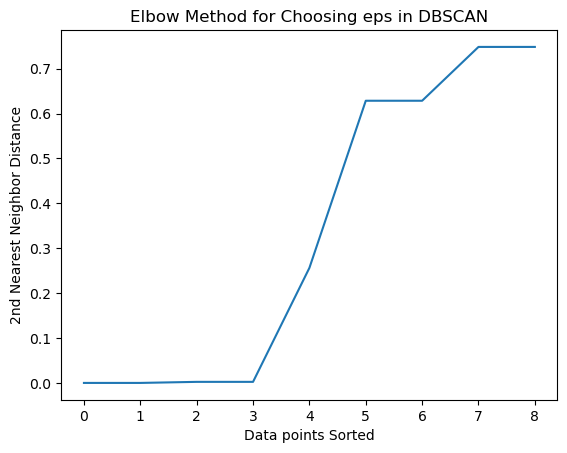

In [212]:
# Sort the distances to find the optimal eps

distances = np.sort(distances[:,1])  # Take second nearest neighbor distance

plt.plot(distances)

plt.xlabel("Data points Sorted")

plt.ylabel("2nd Nearest Neighbor Distance")

plt.title("Elbow Method for Choosing eps in DBSCAN")

plt.show()

In [213]:
# Set optimized parameters

optimal_eps = 0.6  # Adjust this based on the elbow point

optimal_min_samples = 3  # Higher value means stricter cluster formation

In [214]:
# Run DBSCAN with new parameters

dbscan_tuned = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples).fit(X_scaled)

labels_tuned = dbscan_tuned.labels_

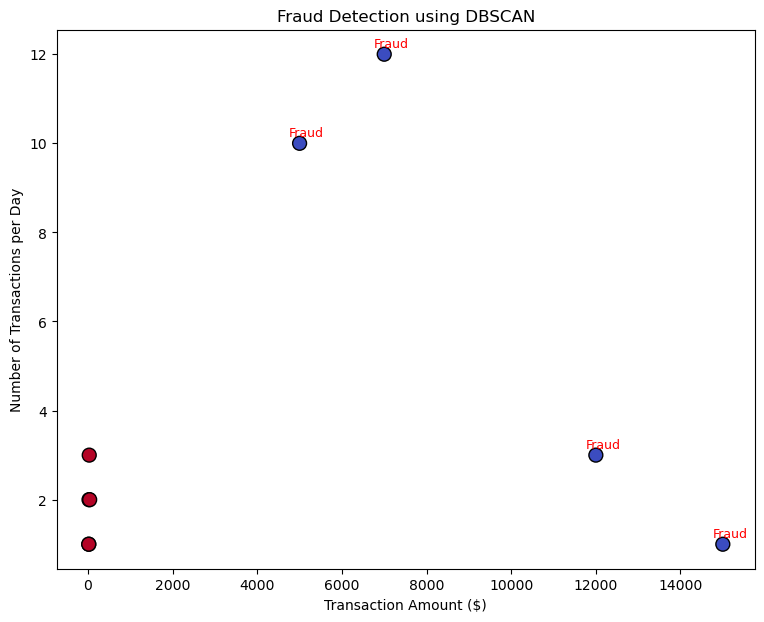

In [215]:
# Plot results

plt.figure(figsize=(9,7))

plt.scatter(X[:, 0], X[:, 1], c=labels_tuned, cmap='coolwarm', edgecolors='k', s=100)

plt.xlabel("Transaction Amount ($)")

plt.ylabel("Number of Transactions per Day")

plt.title("Fraud Detection using DBSCAN")


# Highlight fraud cases (label = -1)

for i, txt in enumerate(labels_tuned):

    if txt== -1:
        plt.annotate('Fraud',(X[i,0], X[i,1]),textcoords='offset points',xytext=(5,5), ha='center',fontsize=9, color='red')


plt.show()

Key Takeaways from Fine-Tuning

✅ eps tuning: Using the elbow method helps define clusters better.
✅ min_samples tuning: Lower values detect more outliers, but too low causes over-detection.
✅ Performance Improvement: The tuned DBSCAN improves fraud detection by better distinguishing clusters.